In [30]:
from Bio.Seq import Seq 

Seq_a = Seq("ATCGGTACCCGTAAGGCATACGCGGTTAAGGCTAGCCTAAGGCGCCTGAACCGTAA")
Seq_b = Seq("TGCATGGATACGCTACAGTTGCGAACGGCTGATGCCATGGTAGCTGCACCGTAGAGC")

In [44]:
def count_gc(seq : Seq):
    # gc = [i for i in Seq if i in "gc"]

    seq = seq.lower()
    gc = []
    for i in seq:
        if(i in "gc"):
            gc.append(i)
    return len(gc)

print(count_gc(Seq_a))
print(count_gc(Seq_b))

31
32


In [42]:
def count_at(seq : Seq):
    seq = seq.lower()
    at = [i for i in seq if i in "at"]
    return len(at)

print(count_at(Seq_a))
print(count_at(Seq_b))

25
25


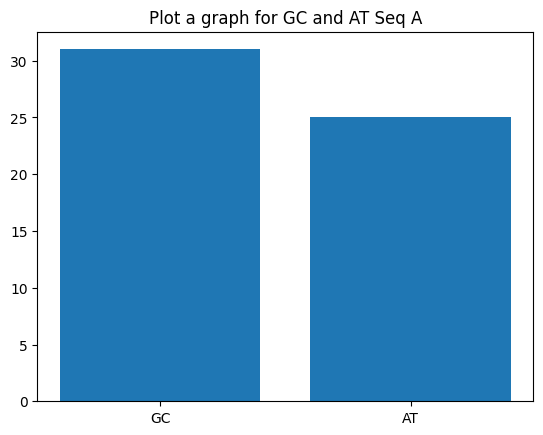

In [33]:
import matplotlib.pyplot as plt 

plt.title("Plot a graph for GC and AT Seq A")
plt.bar(height=[count_gc(Seq_a),count_at(Seq_a)],x=["GC","AT"])
plt.show()

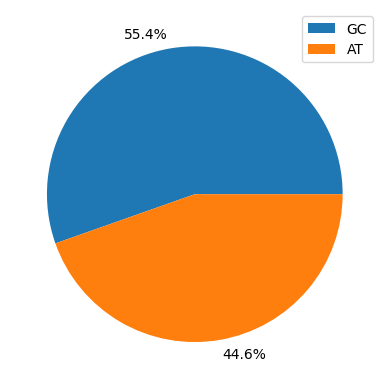

In [34]:
gc_persentage = round(count_gc(Seq_a) / len(Seq_a) * 100,1)
at_persentage = round(count_at(Seq_a) / len(Seq_a) * 100, 1)

plt.pie(x=[gc_persentage,at_persentage],labels=[f"{gc_persentage}%",f"{at_persentage}%"])
plt.legend(["GC","AT"])
plt.show()

In [35]:
from Bio.SeqUtils import MeltingTemp as mt 

wallace_dna_a = mt.Tm_Wallace(Seq_a)
wallace_dna_b = mt.Tm_Wallace(Seq_b)

print("wallace_dna_a : " , wallace_dna_a)
print("wallace_dna_b : " , wallace_dna_b)

wallace_dna_a :  174.0
wallace_dna_b :  178.0


In [36]:
def wallace_manual(seq:Seq):
    
    at = count_at(seq)
    gc = count_gc(seq)

    if(len(seq) <= 13):
        # Tm = (wA + xT ) * 2 + (yG + zC) * 4 
        return at * 2 + gc * 4
    else : 
        # Tm = 64.9 + 41 * (yG + zC - 16.4) / ( wA + xT + yG + zC)
        return 64.9 + 41 * (gc - 16.4 / len(seq))

print(wallace_manual(Seq_a))
print(wallace_manual(Seq_b))

1323.892857142857
1365.10350877193


In [37]:
gc_dna_a = mt.Tm_GC(Seq_a)
gc_dna_b = mt.Tm_GC(Seq_b)

print(gc_dna_a)
print(gc_dna_b)

71.88504492912077
72.39413014215334


In [38]:
nn_dna_a = mt.Tm_NN(Seq_a)
nn_dna_b = mt.Tm_NN(Seq_b)

print(nn_dna_a)
print(nn_dna_b)

74.51933327165364
75.18177891306215


In [50]:
from Bio.SeqUtils import molecular_weight as mw

weight_dna_a = mw(Seq_a)
weight_dna_b = mw(Seq_b)

print(weight_dna_a)
print(weight_dna_b)

17363.0662
17714.269599999996


In [53]:
# Convert DNA TO RNA
rna_a = Seq_a.transcribe()
rna_b = Seq_b.transcribe()

# To find Mollecure Weight second parameter of mw , seq_type need to set "RNA"
weight_rna_a = mw(rna_a,seq_type="RNA")
weight_rna_b = mw(rna_b,seq_type="RNA")

print(weight_rna_a)
print(weight_rna_b)

18118.766600000003
18457.916200000007


In [40]:
def count_each(seq:Seq, t):
    seq = seq.lower()
    t = t.lower()    
    g = [i for i in seq if i == t]
    g = "".join(g)
    
    return mw(g)

print(count_each(Seq_a , 'g'))
print(count_each(Seq_a , 'c'))
print(count_each(Seq_a , 'a'))
print(count_each(Seq_a , 't'))

print(count_each(Seq_a , 't') + count_each(Seq_a , 'a') + count_each(Seq_a , 'c') + count_each(Seq_a , 'g'))

5285.3097
4355.742299999999
4716.112799999999
3059.9473000000007
17417.1121
